Link of deployed app: https://flight-fare-predictor-av.herokuapp.com/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
28h 30m      1
42h 45m      1
5m           1
3h 25m       1
36h 25m      1
Name: Duration, Length: 368, dtype: int64

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10682, 11)

# Exploratory Data Analysis

In [8]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month
train_data['Journey_weekday'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.dayofweek
train_data.drop(columns=['Date_of_Journey'], inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [9]:
train_data['Dep_hr'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute
train_data.drop(columns=['Dep_Time'], inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


In [10]:
train_data['Arr_hr'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arr_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(columns=['Arrival_Time'], inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,4,16,50,21,35


In [11]:
duration = list(train_data.Duration)
dur_h = []
dur_m = []
for i in range(len(duration)):
    d = duration[i].split(sep='h')
    if 'm' in d[0]:
        dur_h.append(0)
        dur_m.append(int(d[0][:-1].strip()))
    else:
        dur_h.append(int(d[0].strip()))
        if 'm' in d[1]:
            dur_m.append(int(d[1][:-1].strip()))
        else:
            dur_m.append(0)
train_data['Duration_hrs'] = dur_h
train_data['Duration_mins'] = dur_m
train_data.drop(columns=['Duration'], inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,16,50,21,35,4,45


# Handling Categorical Data

In [12]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

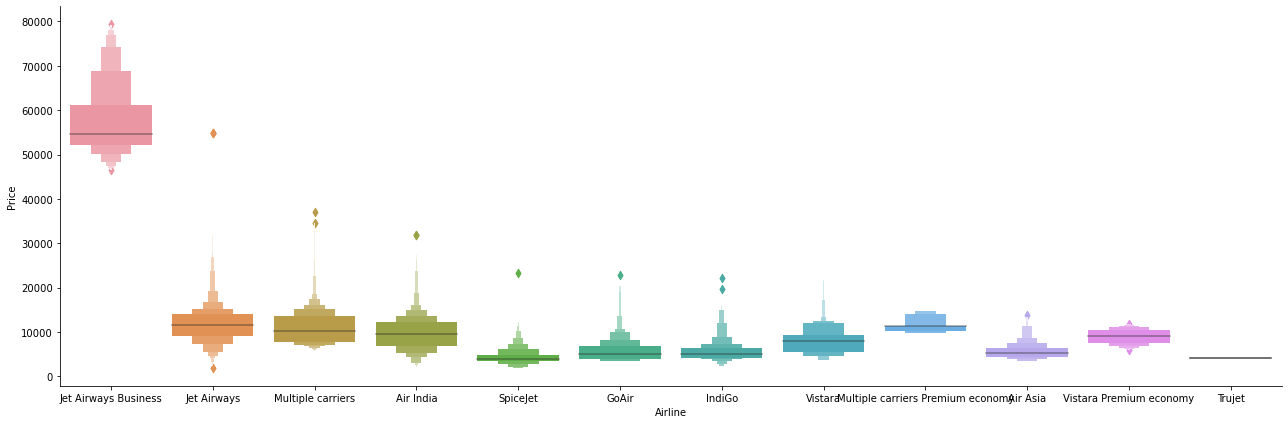

In [13]:
sns.catplot(y='Price', x='Airline', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)

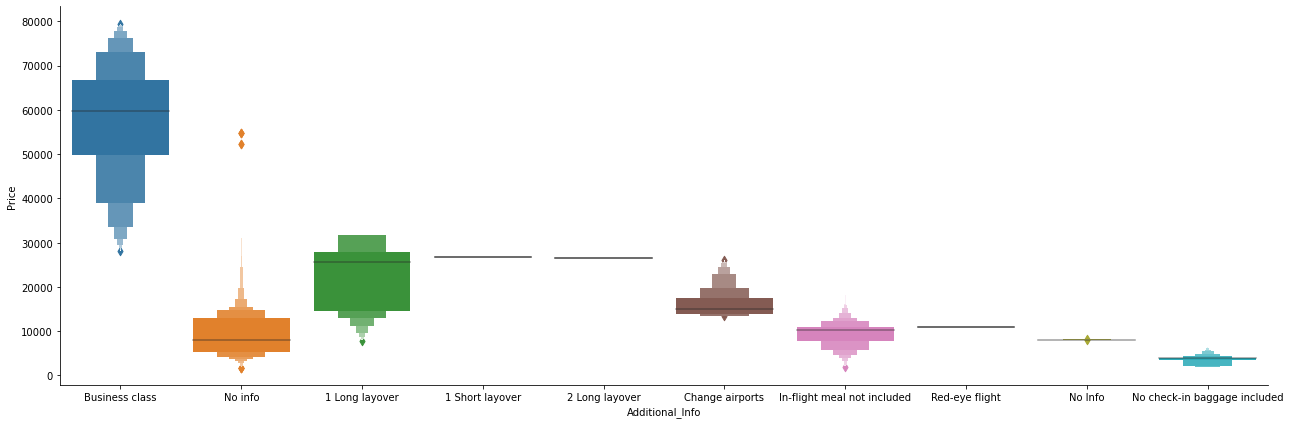

In [14]:
sns.catplot(y='Price', x='Additional_Info', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)

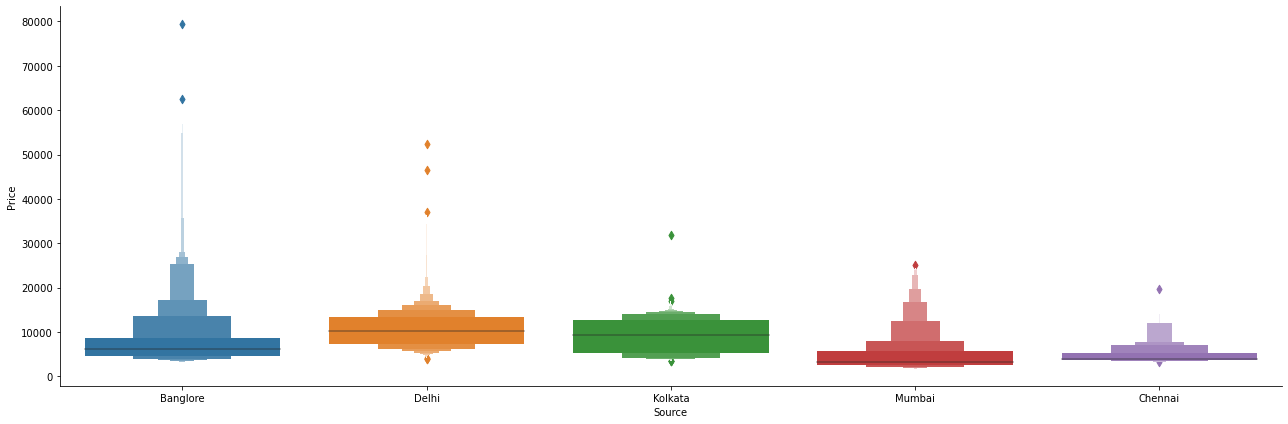

In [15]:
sns.catplot(y='Price', x='Source', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)

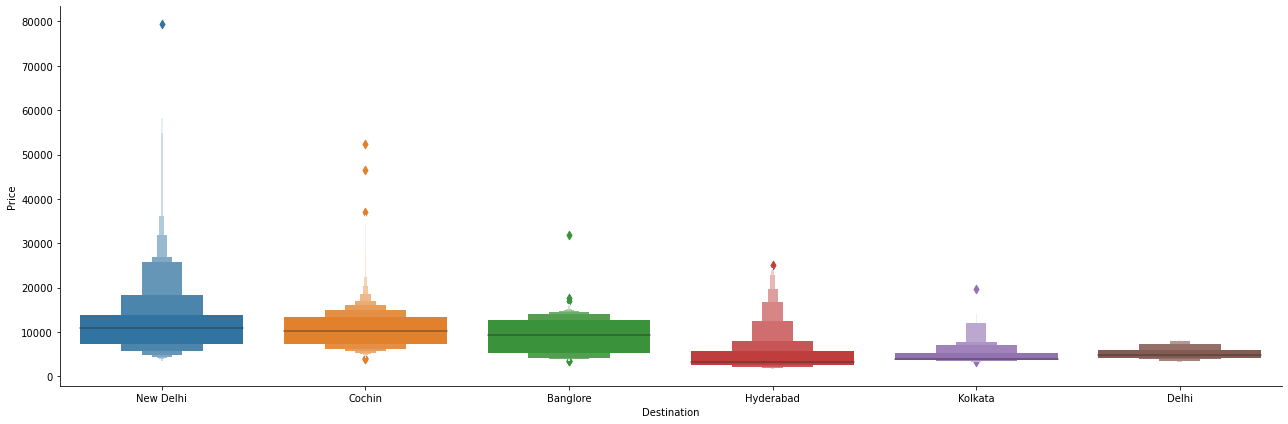

In [16]:
sns.catplot(y='Price', x='Destination', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)

In [17]:
train_data = pd.get_dummies(data=train_data, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)
train_data.drop(columns=['Route'], inplace=True)
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,non-stop,3897,24,3,6,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2 stops,7662,1,5,2,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2 stops,13882,9,6,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1 stop,6218,12,5,6,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1 stop,13302,1,3,4,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [18]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [19]:
stop_cat = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
train_data['Total_Stops'].replace(stop_cat, inplace=True)
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,6,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,2,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,6218,12,5,6,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,4,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


# Let's do same for test data

In [20]:
test_data = pd.read_excel('Test_set.xlsx')

test_data.dropna(inplace=True)

test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.month
test_data['Journey_weekday'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.dayofweek
test_data.drop(columns=['Date_of_Journey'], inplace=True)

test_data['Dep_hr'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(columns=['Dep_Time'], inplace=True)

test_data['Arr_hr'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arr_min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(columns=['Arrival_Time'], inplace=True)

duration = list(test_data.Duration)
dur_h = []
dur_m = []
for i in range(len(duration)):
    d = duration[i].split(sep='h')
    if 'm' in d[0]:
        dur_h.append(0)
        dur_m.append(int(d[0][:-1].strip()))
    else:
        dur_h.append(int(d[0].strip()))
        if 'm' in d[1]:
            dur_m.append(int(d[1][:-1].strip()))
        else:
            dur_m.append(0)
test_data['Duration_hrs'] = dur_h
test_data['Duration_mins'] = dur_m
test_data.drop(columns=['Duration', 'Route'], inplace=True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,3,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,6,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,1,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,1,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,0,23,55,2,45,2,50


In [21]:
airline_cols = [col for col in train_data.columns if 'Airline_' in col]
source_cols = [col for col in train_data.columns if 'Source_' in col]
dest_cols = [col for col in train_data.columns if 'Destination_' in col]
add_info_cols = [col for col in train_data.columns if 'Additional_Info_' in col]
airlines = []
sources = []
dests = []
add_infos = []
for col in airline_cols:
    airlines.append(col.split('_')[-1])
for col in source_cols:
    sources.append(col.split('_')[-1])
for col in dest_cols:
    dests.append(col.split('_')[-1])
for col in add_info_cols:
    add_infos.append(col.split('_')[-1])
airlines = np.array(airlines)
sources = np.array(sources)
dests = np.array(dests)
add_infos = np.array(add_infos)

In [22]:
test_airline_cols = []
test_airlines_list = test_data.Airline.values
for i in test_airlines_list:
    test_airline_row = np.zeros(len(airlines), dtype=int)
    pos = np.where(airlines == i)[0]
    if len(pos) != 0:
        pos = pos[0]
        test_airline_row[pos] = 1
    test_airline_cols.append(test_airline_row.tolist())
test_airlines_onehot = pd.DataFrame(test_airline_cols, columns=airline_cols)

test_source_cols = []
test_sources_list = test_data.Source.values
for i in test_sources_list:
    test_source_row = np.zeros(len(sources), dtype=int)
    pos = np.where(sources == i)[0]
    if len(pos) != 0:
        pos = pos[0]
        test_source_row[pos] = 1
        test_source_cols.append(test_source_row.tolist())
test_sources_onehot = pd.DataFrame(test_source_cols, columns=source_cols)

test_dest_cols = []
test_dests_list = test_data.Destination.values
for i in test_dests_list:
    test_dest_row = np.zeros(len(dests), dtype=int)
    pos = np.where(dests == i)[0]
    if len(pos) != 0:
        pos = pos[0]
        test_dest_row[pos] = 1
    test_dest_cols.append(test_dest_row.tolist())
test_dests_onehot = pd.DataFrame(test_dest_cols, columns=dest_cols)

test_add_info_cols = []
test_add_infos_list = test_data.Additional_Info.values
for i in test_add_infos_list:
    test_add_info_row = np.zeros(len(add_infos), dtype=int)
    pos = np.where(add_infos == i)[0]
    if len(pos) != 0:
        pos = pos[0]
        test_add_info_row[pos] = 1
    test_add_info_cols.append(test_add_info_row.tolist())
test_add_infos_onehot = pd.DataFrame(test_add_info_cols, columns=add_info_cols)

In [23]:
test_data = pd.concat([test_data, test_airlines_onehot, test_sources_onehot, test_dests_onehot, test_add_infos_onehot], axis=1)
test_data.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'], inplace=True)
test_data['Total_Stops'].replace(stop_cat, inplace=True)
print(test_data.shape)
print(train_data.shape)
test_data.head()

(2671, 39)
(10682, 40)


,Total_Stops,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,1,6,6,3,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,12,5,6,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,21,5,1,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,21,5,1,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,24,6,0,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# Training Part

In [24]:
X = train_data[['Total_Stops', 'Journey_day', 'Journey_month',
       'Journey_weekday', 'Dep_hr', 'Dep_min', 'Arr_hr', 'Arr_min',
       'Duration_hrs', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight']]
y = train_data[['Price']]

In [25]:
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_weekday,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,6,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,1,5,2,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,9,6,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,12,5,6,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,3,4,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [26]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [27]:
x_pred = test_data[['Total_Stops', 'Journey_day', 'Journey_month',
       'Journey_weekday', 'Dep_hr', 'Dep_min', 'Arr_hr', 'Arr_min',
       'Duration_hrs', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight']]

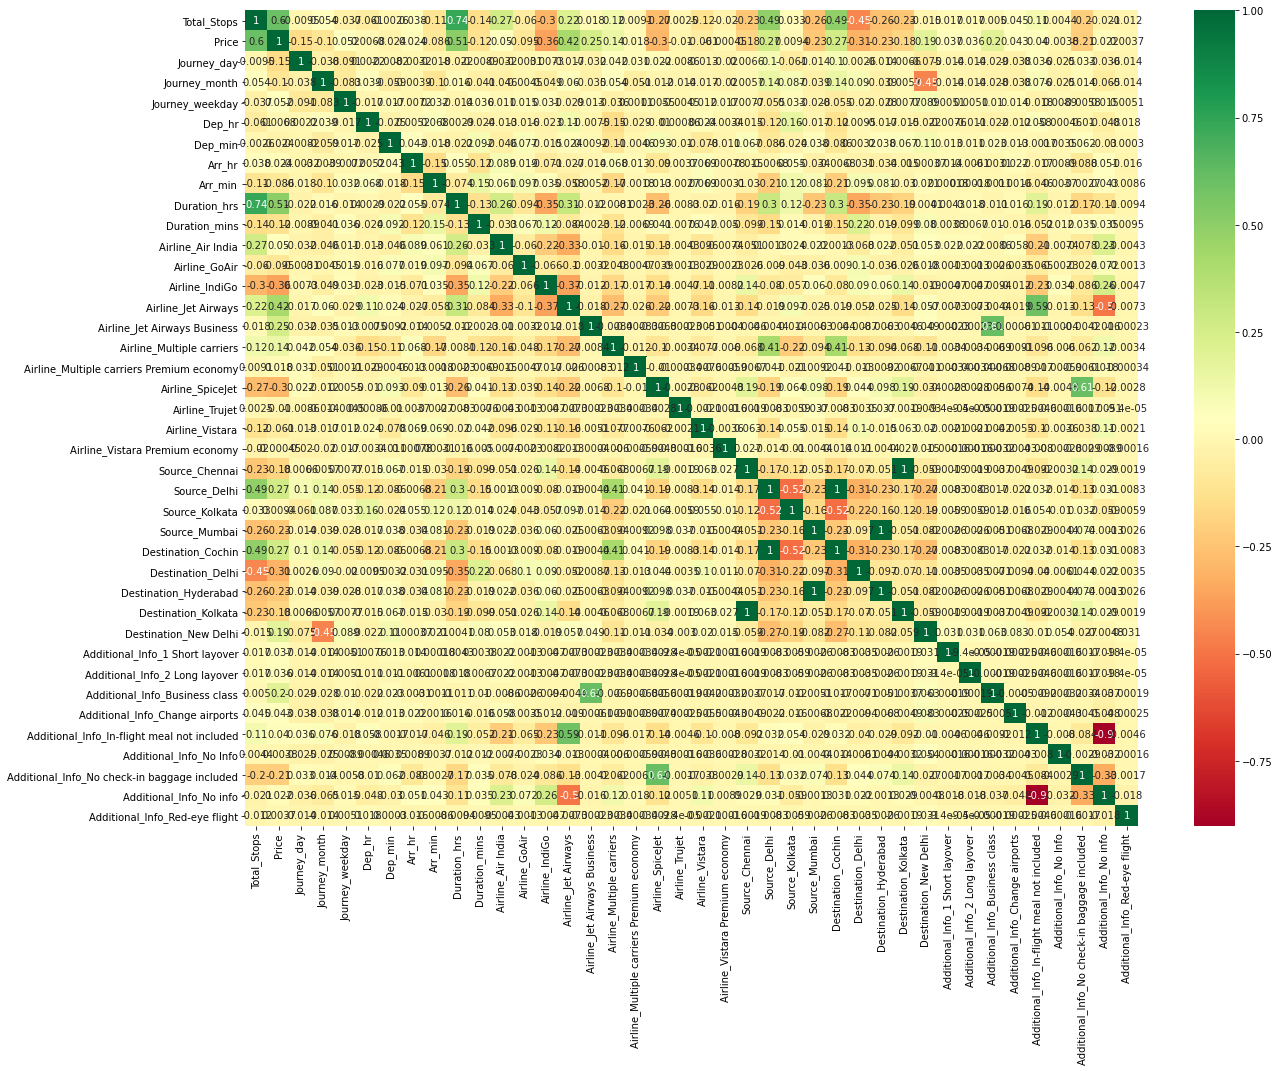

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

<ipython-input-29-b5cac6a798fb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


ExtraTreesRegressor()

In [30]:
print(selection.feature_importances_)

[2.24710113e-01 6.64088195e-02 4.66858157e-02 3.20026573e-02
 2.10313782e-02 1.79900547e-02 2.50908201e-02 1.56165543e-02
 1.17992119e-01 1.41403044e-02 8.63434718e-03 1.88318319e-03
 1.80701841e-02 1.34289029e-01 6.48014226e-02 1.82621835e-02
 8.70807761e-04 2.95841407e-03 1.08323249e-04 4.73205586e-03
 7.56203773e-05 4.87506102e-04 1.25516839e-02 4.21494104e-03
 4.11387838e-03 9.00488894e-03 9.32078190e-03 5.53096319e-03
 4.38979253e-04 3.14091901e-02 1.52528985e-04 1.28908526e-04
 1.17512538e-03 8.21474620e-04 7.90739084e-02 5.08599574e-05
 2.88437338e-05 5.13195389e-03 9.37721550e-06]


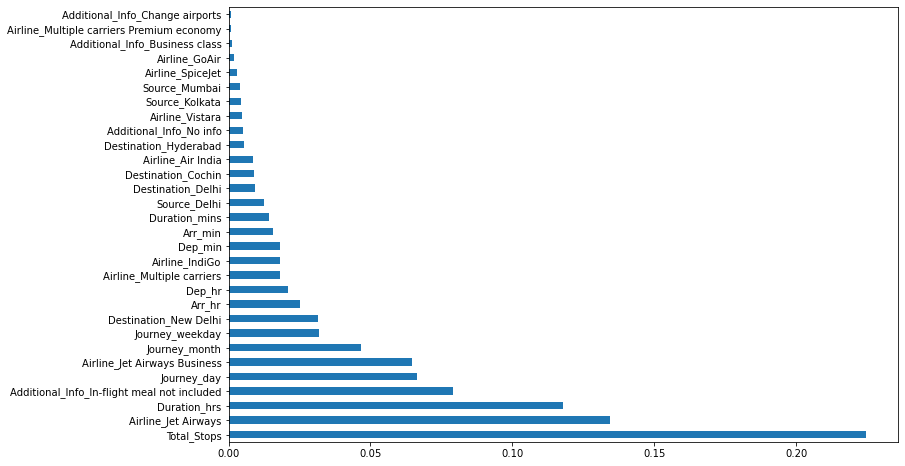

In [31]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

<ipython-input-33-582b695ae87c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [34]:
y_pred = reg_rf.predict(X_test)

In [35]:
reg_rf.score(X_train, y_train)

0.9821850604650992

In [36]:
reg_rf.score(X_test, y_test)

0.8792317509423375

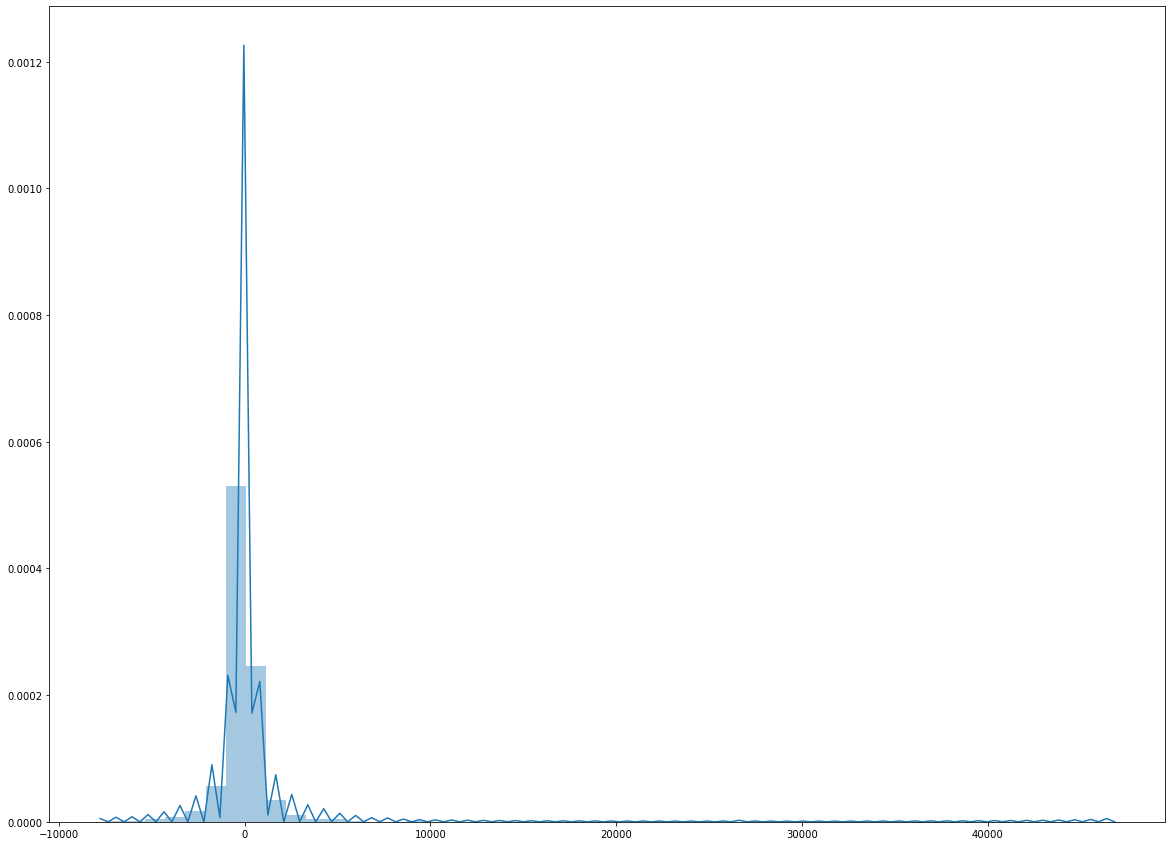

In [37]:
y_pred = y_pred.reshape(-1, 1)
plt.figure(figsize=(20,15))
sns.distplot(y_test-y_pred)
plt.show()

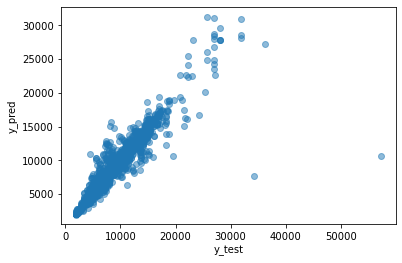

In [38]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 637.4407607738931
MSE: 2604011.788351718
RMSE: 1613.6950729154867


In [40]:
metrics.r2_score(y_test, y_pred)

0.8792317509423375

# Hyperparameter Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [42]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [44]:
prediction = rf_random.predict(X_test)

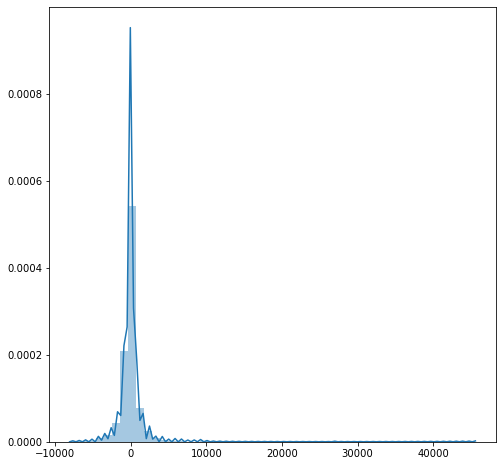

In [45]:
prediction = prediction.reshape(-1, 1)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

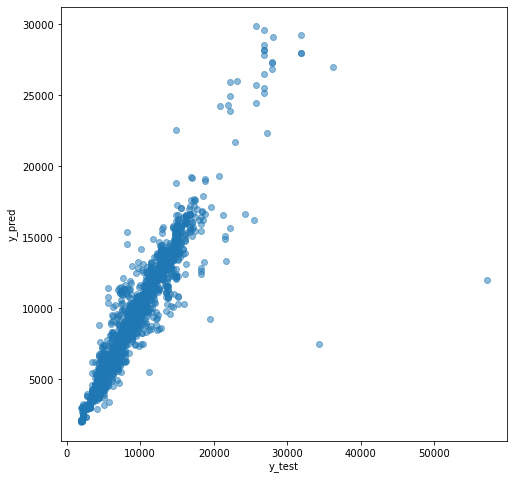

In [46]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 731.4658175891317
MSE: 2790181.3603435475
RMSE: 1670.3835967655896


In [48]:
import pickle
file = open('flight_rf.pkl', 'wb')

pickle.dump(reg_rf, file)

In [49]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [50]:
y_prediction = forest.predict(X_test)

In [51]:
metrics.r2_score(y_test, y_prediction)

0.8792317509423375